<a href="https://colab.research.google.com/github/Saifullah74/IDA_HomeWork/blob/main/IDA_Home_Work_Task_FHD1VM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SECTION 1: Mount Drive and Import Libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SECTION 2: Load Dataset

In [2]:
# 1) Load the dataset (change the path if needed)
data = pd.read_csv('/content/drive/MyDrive/Saif_PhD/IDA_Project /heart.csv')


SECTION 3: Data Overview

Basic Dataset Info

In [3]:
# Dataset overview
print("First five rows of dataset")
display(data.head())

print("\nDataset info")
print(data.info())

print("\nSummary statistics")
display(data.describe())


First five rows of dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Summary statistics


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis (EDA)

Correlation Heatmap

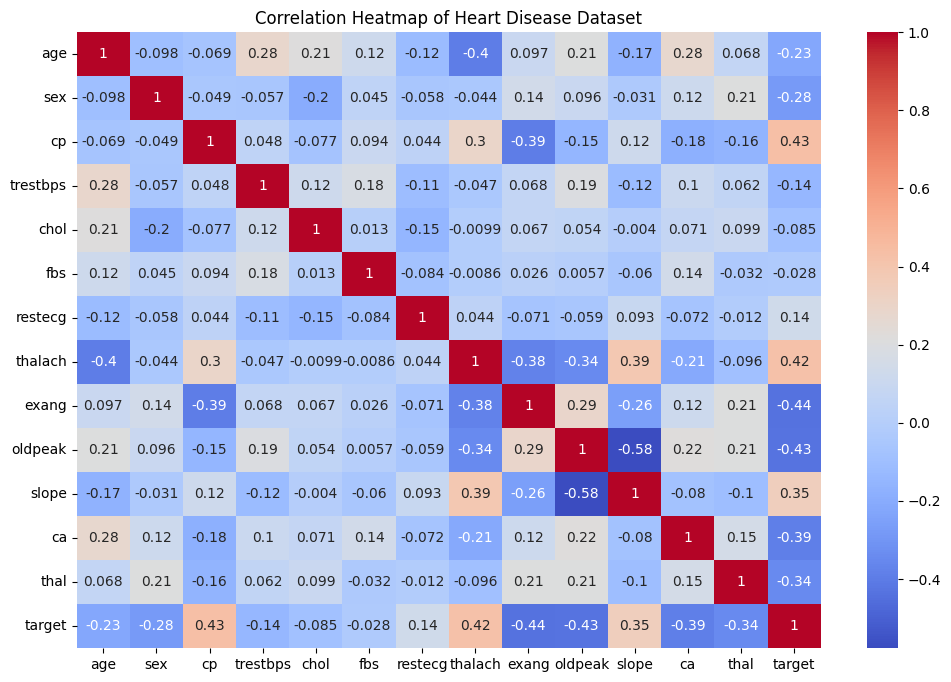

In [4]:
# NEW CODE: Heatmap correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()


Boxplots for Outlier Detection

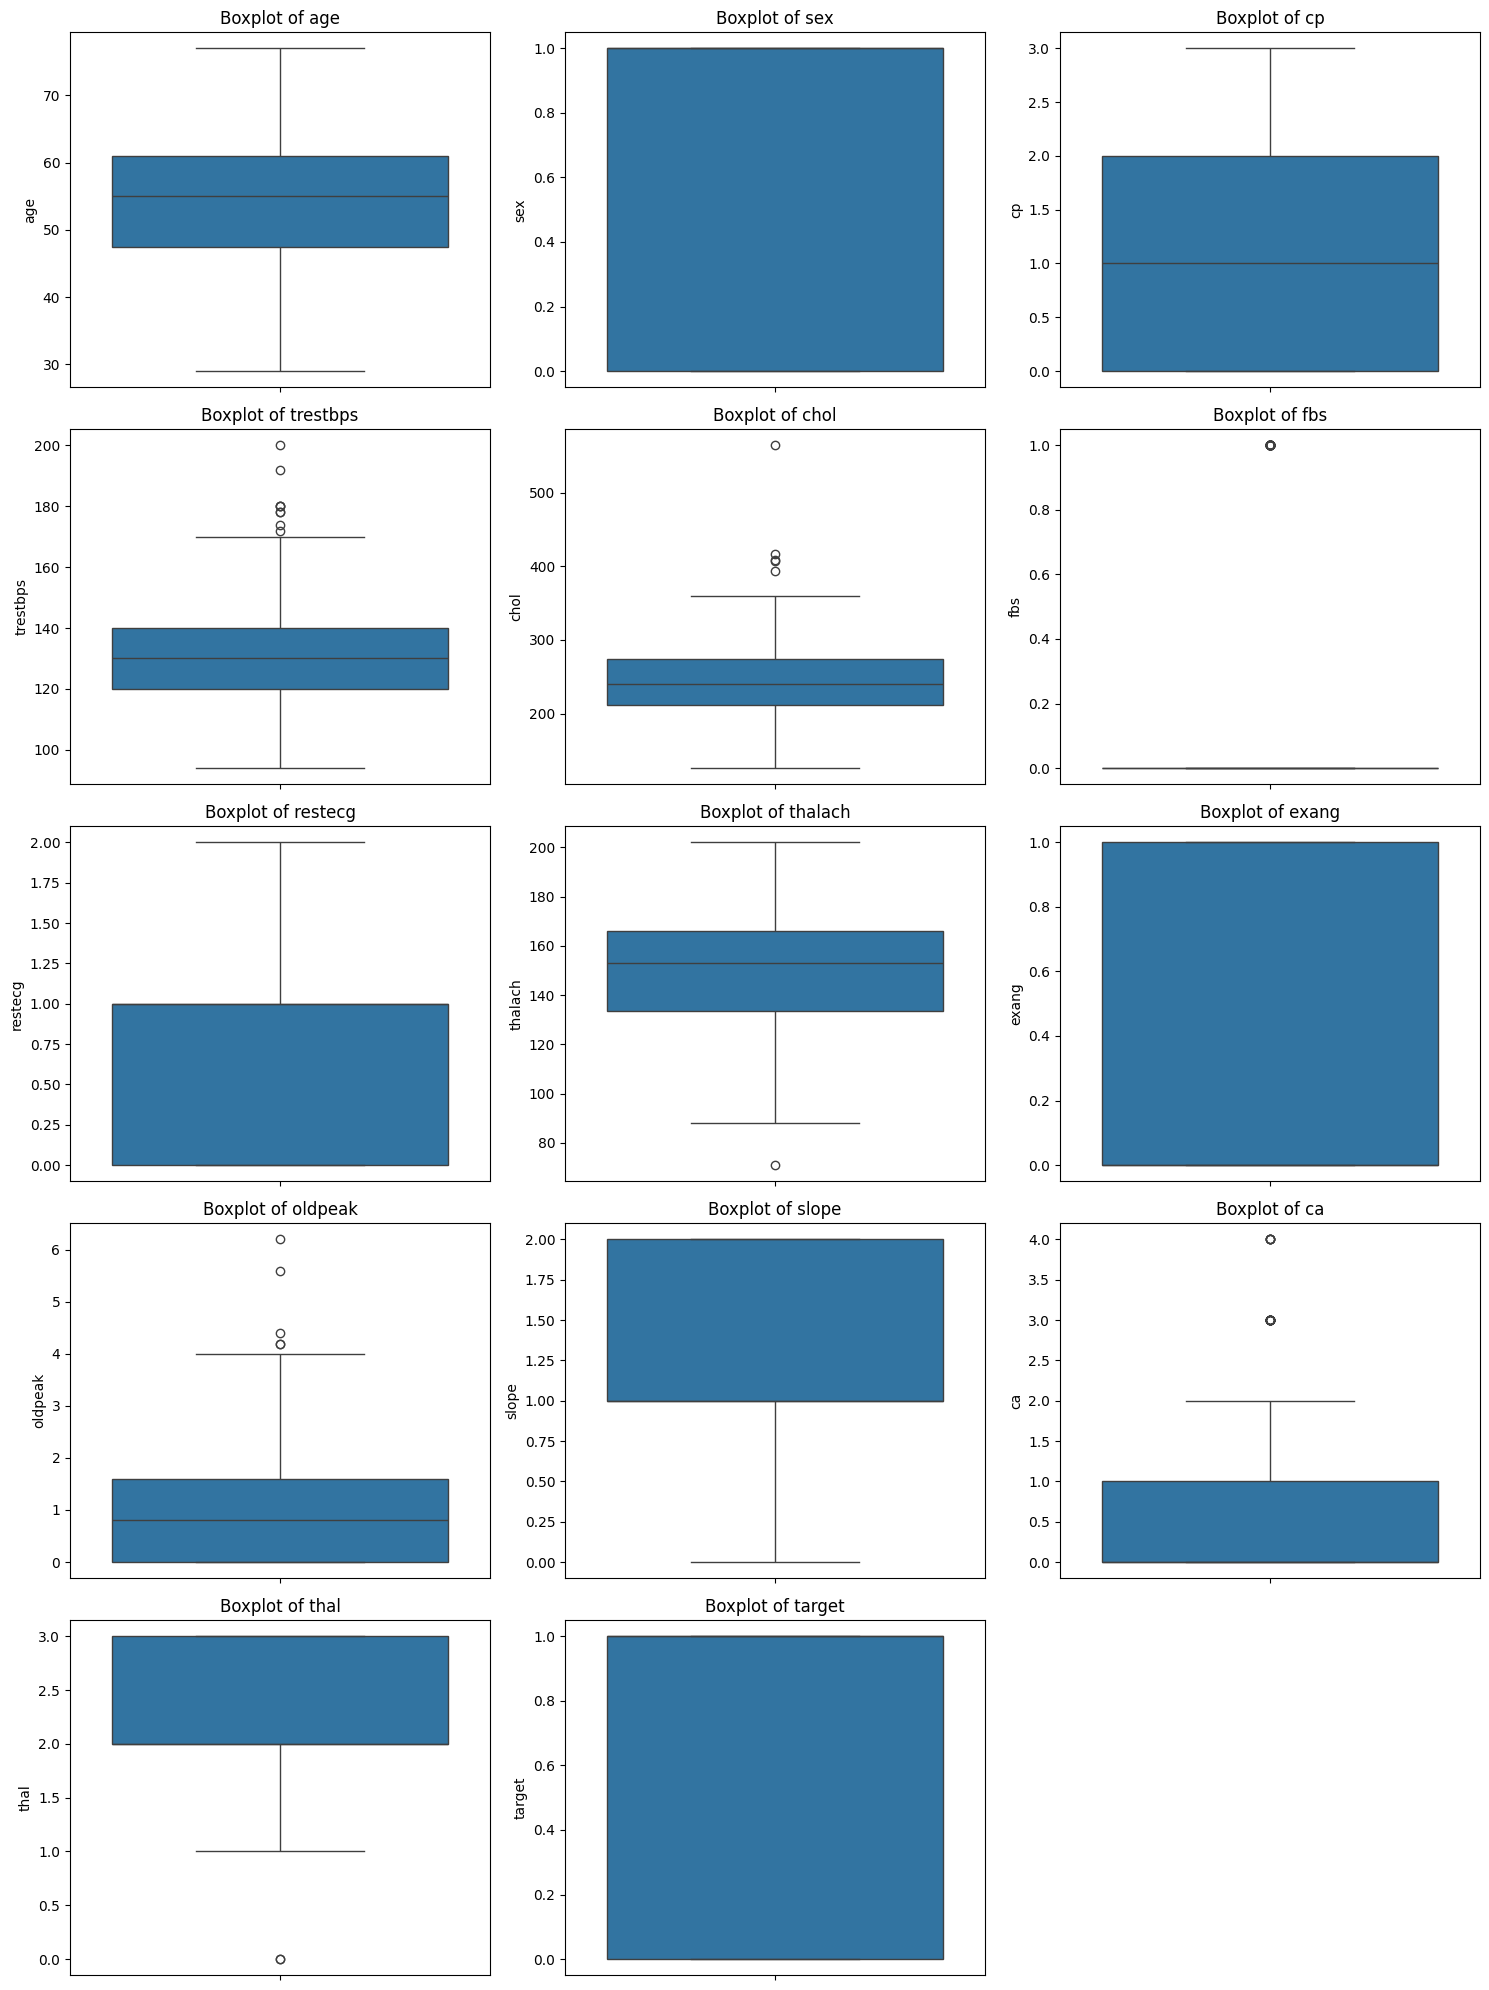

In [5]:
# NEW CODE: Boxplots for numerical features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Train Test Split

In [6]:
# 2) Split features and target
X = data.drop(columns='target')
y = data['target']

# 3) Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Baseline Logistic Regression

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# A) BASELINE LOGISTIC REGRESSION
# =========================
print("\n=== Baseline Logistic Regression ===")
base_lr = LogisticRegression(max_iter=1000, random_state=42)
base_lr.fit(X_train_scaled, y_train)

y_test_pred_lr = base_lr.predict(X_test_scaled)
print("Test accuracy (baseline LR):", accuracy_score(y_test, y_test_pred_lr))
print("Confusion matrix (baseline LR):\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification report (baseline LR):\n", classification_report(y_test, y_test_pred_lr))


=== Baseline Logistic Regression ===
Test accuracy (baseline LR): 0.8032786885245902
Confusion matrix (baseline LR):
 [[19  9]
 [ 3 30]]
Classification report (baseline LR):
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



Cross Validation

In [8]:
# =========================
# B) 5-fold Cross-Validation (Pipeline: StandardScaler + LR)
# =========================
print("\n=== 5-fold Cross-Validation (Baseline LR, with scaling) ===")
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

cv_scores = cross_val_score(
    pipe_lr,
    X,
    y,
    cv=5,
    scoring='accuracy'
)
print("CV accuracy mean:", cv_scores.mean())
print("CV accuracy std:", cv_scores.std())



=== 5-fold Cross-Validation (Baseline LR, with scaling) ===
CV accuracy mean: 0.8348633879781422
CV accuracy std: 0.04106789147392117


Balanced Logistic Regression

In [9]:
# =========================
# C) LOGISTIC REGRESSION WITH CLASS_WEIGHT='balanced'
# =========================
print("\n=== Balanced Logistic Regression (class_weight='balanced') ===")
bal_lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
bal_lr.fit(X_train_scaled, y_train)

y_test_pred_bal = bal_lr.predict(X_test_scaled)
print("Test accuracy (balanced LR):", accuracy_score(y_test, y_test_pred_bal))
print("Classification report (balanced LR):\n", classification_report(y_test, y_test_pred_bal))



=== Balanced Logistic Regression (class_weight='balanced') ===
Test accuracy (balanced LR): 0.7868852459016393
Classification report (balanced LR):
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



Tuned Logistic Regression

In [10]:
# =========================
# D) TUNED LOGISTIC REGRESSION (GridSearchCV)
# =========================
print("\n=== Tuned Logistic Regression (GridSearchCV) ===")

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

lr_for_grid = LogisticRegression(max_iter=5000, random_state=42)

grid = GridSearchCV(
    estimator=lr_for_grid,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best params (LR):", grid.best_params_)
print("Best CV score (LR):", grid.best_score_)

best_lr = grid.best_estimator_
y_test_pred_best_lr = best_lr.predict(X_test_scaled)
print("Test accuracy (tuned LR):", accuracy_score(y_test, y_test_pred_best_lr))
print("Classification report (tuned LR):\n", classification_report(y_test, y_test_pred_best_lr))

# ROC-AUC for tuned LR
if hasattr(best_lr, "predict_proba"):
    y_proba_best_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
    print("ROC-AUC (tuned LR):", roc_auc_score(y_test, y_proba_best_lr))



=== Tuned Logistic Regression (GridSearchCV) ===
Best params (LR): {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score (LR): 0.8472789115646258
Test accuracy (tuned LR): 0.7868852459016393
Classification report (tuned LR):
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

ROC-AUC (tuned LR): 0.8798701298701299


Random Forest

In [11]:
# =========================
# E) RANDOM FOREST (no scaling needed)
# =========================
print("\n=== Random Forest ===")
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)
print("Test accuracy (Random Forest):", accuracy_score(y_test, y_test_pred_rf))
print("Classification report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))

# ROC-AUC for RF
if hasattr(rf, "predict_proba"):
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_proba_rf))



=== Random Forest ===
Test accuracy (Random Forest): 0.819672131147541
Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61

ROC-AUC (Random Forest): 0.900974025974026


SVM (RBF Kernel)

In [12]:
# =========================
# F) SVM with RBF kernel (needs scaling)
# =========================
print("\n=== SVM (RBF kernel) ===")
svc = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

y_test_pred_svm = svc.predict(X_test_scaled)
print("Test accuracy (SVM):", accuracy_score(y_test, y_test_pred_svm))
print("Classification report (SVM):\n", classification_report(y_test, y_test_pred_svm))

# ROC-AUC for SVM
y_proba_svm = svc.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC (SVM):", roc_auc_score(y_test, y_proba_svm))



=== SVM (RBF kernel) ===
Test accuracy (SVM): 0.819672131147541
Classification report (SVM):
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

ROC-AUC (SVM): 0.8831168831168832


Prediction Function

In [13]:
# =========================
# G) FINAL PREDICTION FUNCTION (using tuned LR + scaler)
# =========================
def predict_heart_disease(features_list):
    """
    Predict heart disease using the tuned Logistic Regression model.
    features_list must be in the same order as columns in X.
    """
    arr = np.array(features_list).reshape(1, -1)
    arr_scaled = scaler.transform(arr)
    pred = best_lr.predict(arr_scaled)[0]
    if pred == 1:
        return "Person HAS heart disease"
    else:
        return "Person does NOT have heart disease"


Example Prediction

In [14]:
# H) Example prediction
example_patient = [62, 1, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2]
print("\nExample prediction:", predict_heart_disease(example_patient))



Example prediction: Person does NOT have heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Statistical Comparison of All Models

,Model,Accuracy,AUC
0,Baseline LR,0.803279,0.869048
1,Balanced LR,0.786885,0.871212
2,Tuned LR,0.786885,0.879870
3,Random Forest,0.819672,0.900974
4,SVM (RBF),0.819672,0.883117


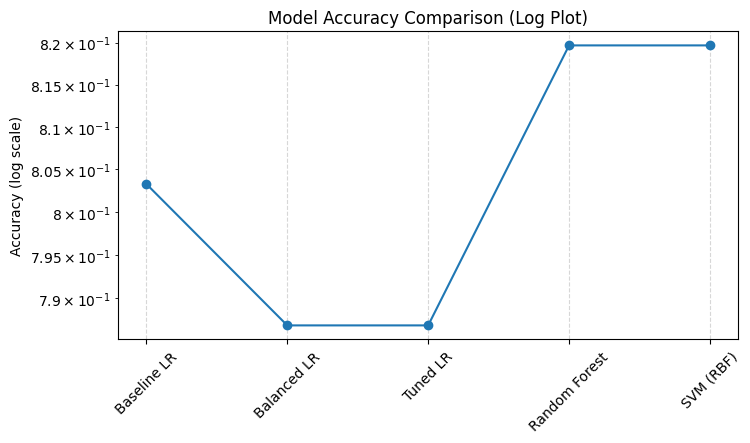

In [15]:
# ============================
# Fixed Model Comparison + Log Plot
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Accuracy and AUC values collected from models
acc = {
    "Baseline LR": accuracy_score(y_test, y_test_pred_lr),
    "Balanced LR": accuracy_score(y_test, y_test_pred_bal),
    "Tuned LR": accuracy_score(y_test, y_test_pred_best_lr),
    "Random Forest": accuracy_score(y_test, y_test_pred_rf),
    "SVM (RBF)": accuracy_score(y_test, y_test_pred_svm),
}

auc = {
    "Baseline LR": roc_auc_score(y_test, base_lr.predict_proba(X_test_scaled)[:,1]),
    "Balanced LR": roc_auc_score(y_test, bal_lr.predict_proba(X_test_scaled)[:,1]),
    "Tuned LR": roc_auc_score(y_test, best_lr.predict_proba(X_test_scaled)[:,1]),
    "Random Forest": roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
    "SVM (RBF)": roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:,1]),
}

# Create proper DataFrame (models as rows)
df = pd.DataFrame({
    "Model": list(acc.keys()),
    "Accuracy": list(acc.values()),
    "AUC": list(auc.values())
})

display(df)

# Logarithmic accuracy plot
plt.figure(figsize=(8,4))
plt.plot(df["Model"], df["Accuracy"], marker="o")
plt.yscale("log")
plt.ylabel("Accuracy (log scale)")
plt.title("Model Accuracy Comparison (Log Plot)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.show()
